# Main Sequence Mass-Radius Relation

Figure 1.13 from Chapter 1 of *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University 
Press.

Plot of stellar radius R as a function of Mass M for the same set of main sequence stars used in the
associated Mass-Luminosity figures.

Data from [Eker et al. 2018, MNRAS, 479, 5491](https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.5491E).

Selection criteria: Exclude stars
 * tagged by Eker et al. as types 1,2,3 (discarded for various reasons)
 * tagged as GLB (globlar cluster stars)
 * with luminosity classes III, IV, or IV-V
 * with mass and radius errors >10%
 * with luminosity errors >40%

The data were further augmented by computing logL from logR and logT from the original Eker et al. 
table (provided to use by Eker as a CSV file).

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [2]:
plotFile = 'Fig1_13.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## MS Star MLR Data

Data are from Eker et al. 2018 [MNRAS, 479, 5491](https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.5491E), 
Table 1.  Relevant columns for this plot are `logM` and `logR`.  

In [3]:
dataFile = 'MainSequence_MLR.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

Msun = 10.0**np.array(data['logM'])
Rsun = 10.0**np.array(data['logR'])

## Figure 1.13 - Main Sequence Mass-Radius Relation

Plot of M vs R in log-log space, best fits locii plotted.

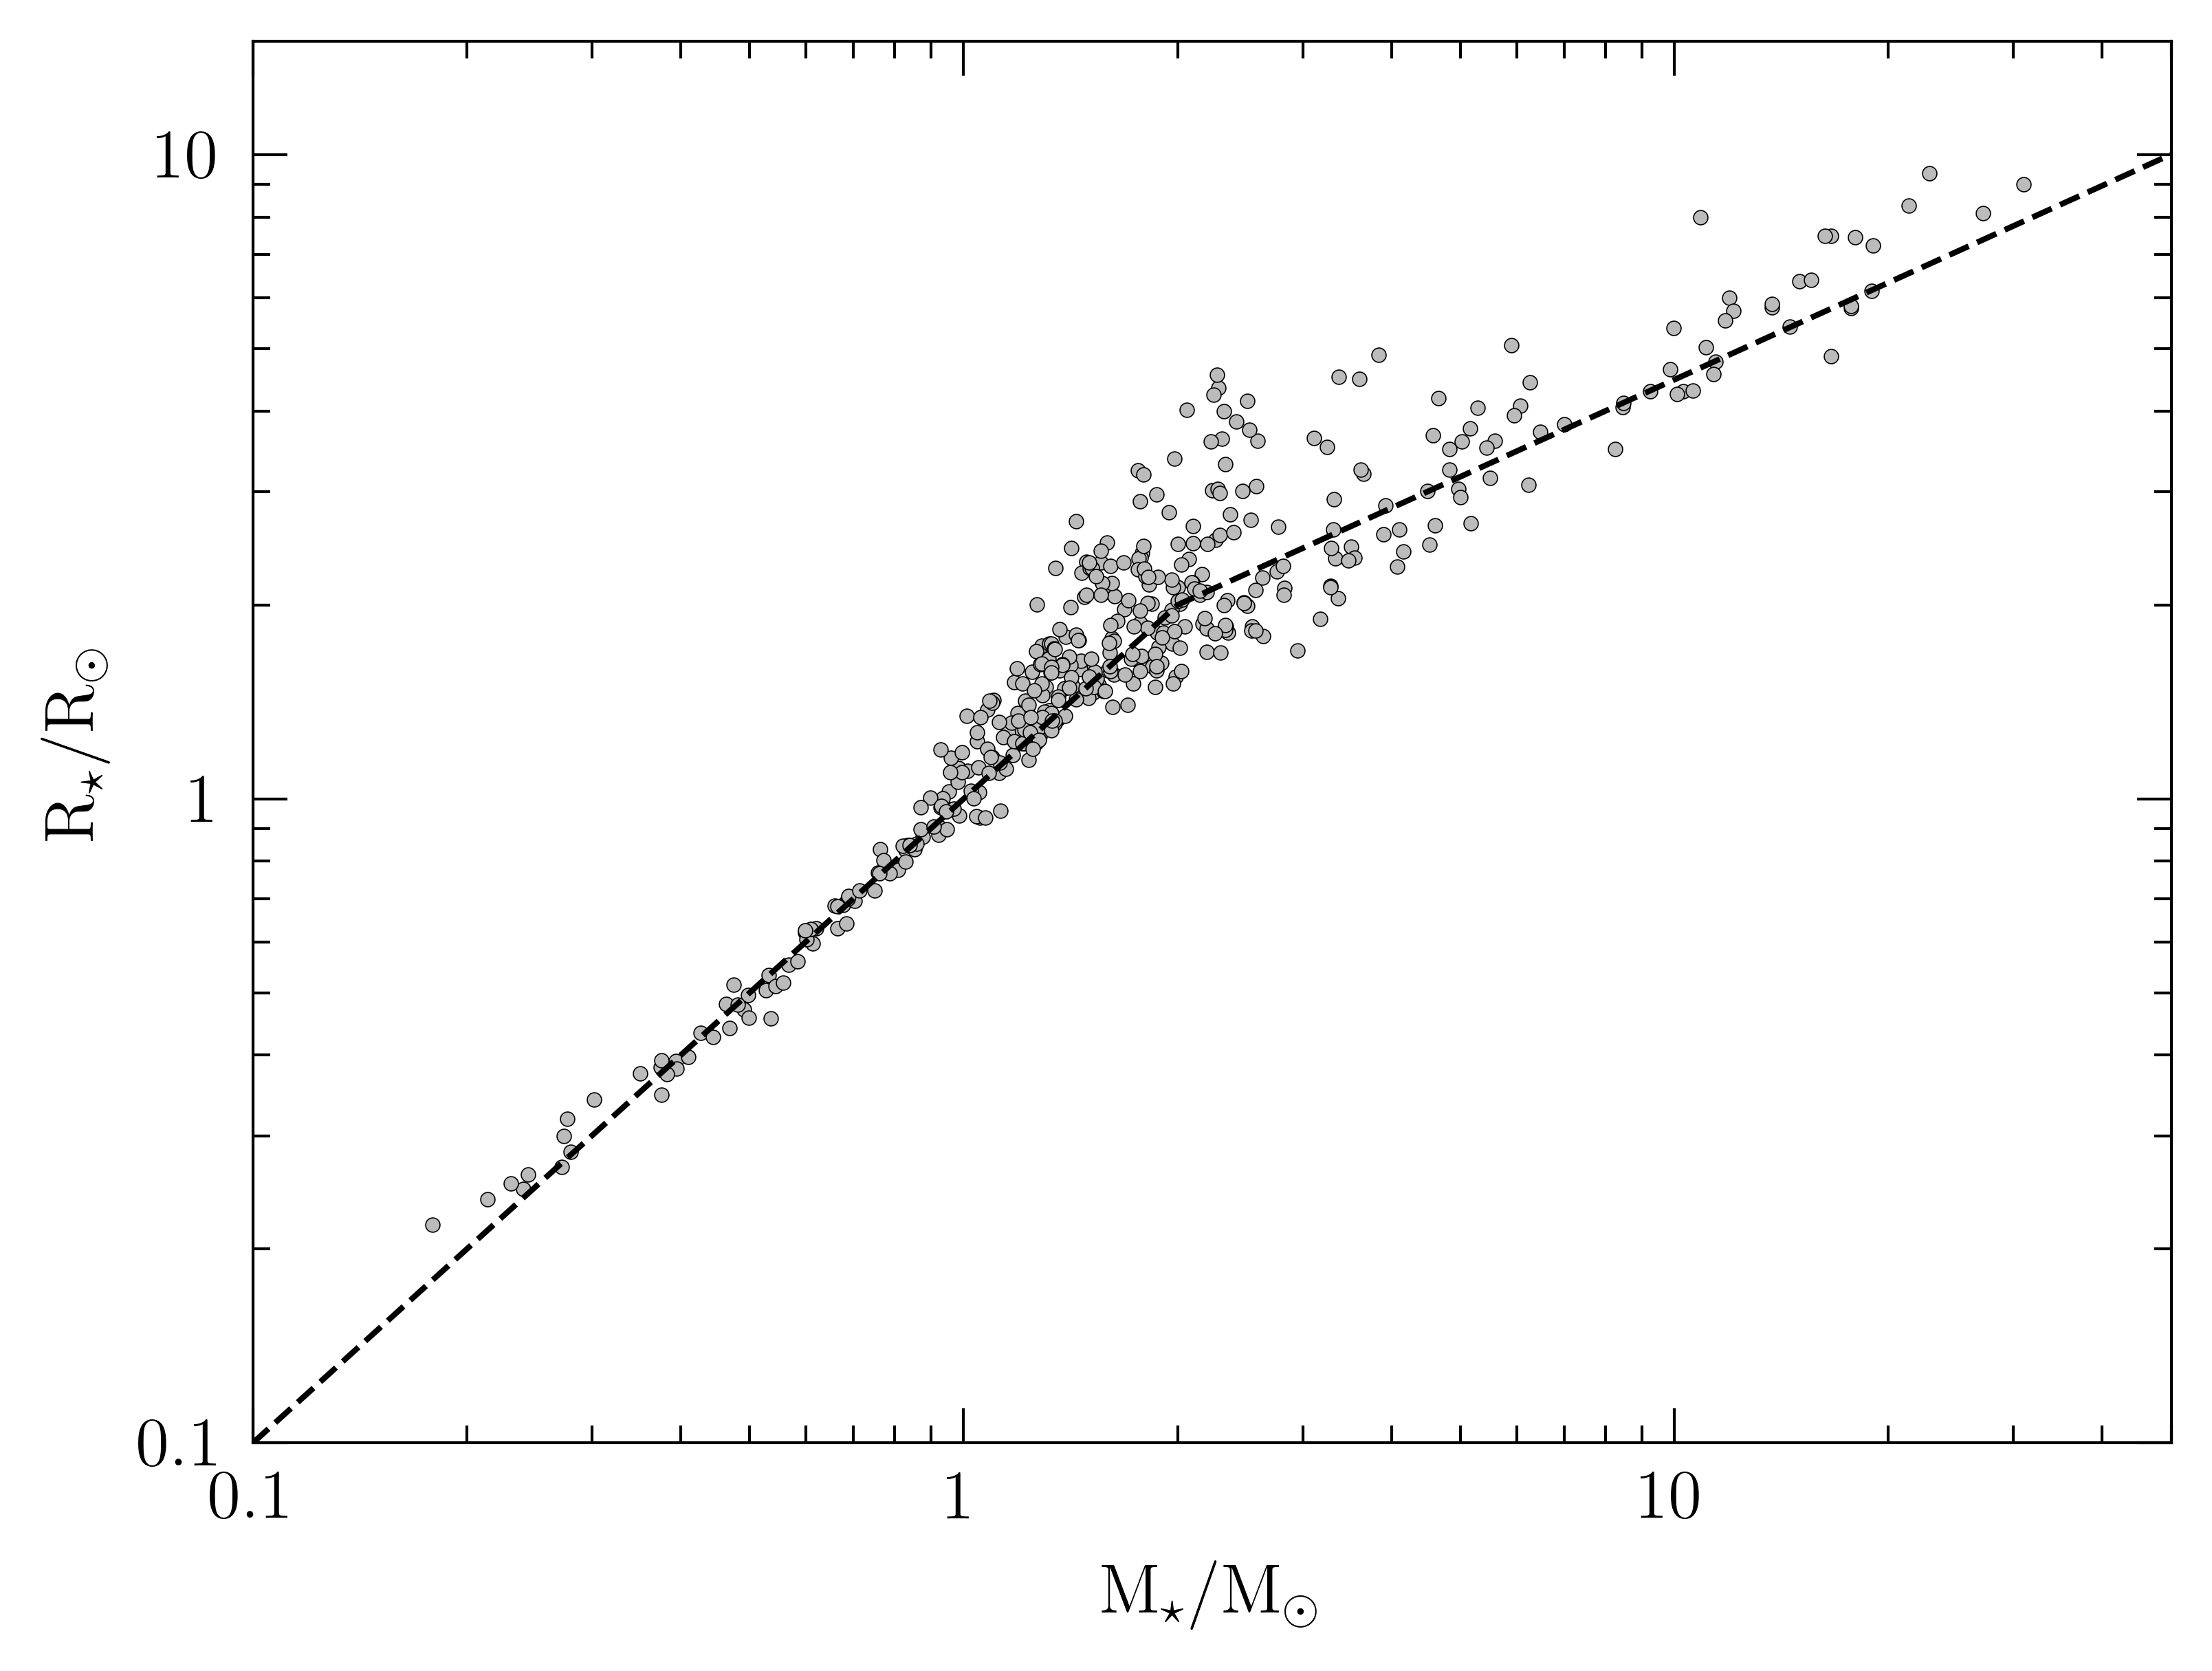

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

minM = 0.1
maxM = 50
minR = 0.1
maxR = 15

ax.set_xlim(minM,maxM)
ax.set_xlabel(r'M$_\star$/M$_\odot$',fontsize=axisFontSize)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([0.1,1.,10.])
ax.set_xticklabels(['0.1','1','10'])

ax.set_ylim(minR,maxR)
ax.set_ylabel(r'R$_\star$/R$_\odot$',fontsize=axisFontSize)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([0.1,1,10])
ax.set_yticklabels(['0.1','1','10'])

plt.plot(Msun,Rsun,'o',mfc='#bbbbbb',mec='black',markersize=2.5,mew=0.2,zorder=10)

# M-R relation powerlaws

pwM = 10.0**np.array([-1.0,0.301,2.0])
pwR = 10.0**np.array([-1.0,0.301,1.151])

ax.plot(pwM,pwR,'--',color='black',lw=1,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')